In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 8, 12]

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.TremorModelTrainer(config, subject="Xianyu")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_Xianyu/Baseline_results_train_with_{K}data_X.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/16 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
(8521, 4, 14, 1) (8521,) (86, 4, 14, 1) (86,)
Dataset 2/16 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 87.52%
Maximum validation accuracy : 91.86%
Accuracy of test dataset using model V0: 91.8605%
Dataset 3/16 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.9924%
Dataset 4/16 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 49.7893%
Dataset 5/16 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 74.4495%
Dataset 6/16 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.6241%
Dataset 7/16 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Accuracy on unseen dataset: 88.9057%
Dataset 8/16 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Accuracy on unseen dataset: 55.7665%
Dataset 9/16 - Session Exp_2025-07-01-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 64.8436%
Dataset

In [5]:
b_path = 'C:/Users/hml76/PycharmProjects/Tremor_project_local/NCI_mindforce'
baseline_K = ['1', '4', '8', '12']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_Xianyu/Baseline_results_train_with_{K}data_X.csv')

SUBJECT = "Xianyu"

In [ ]:
import Target

prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)

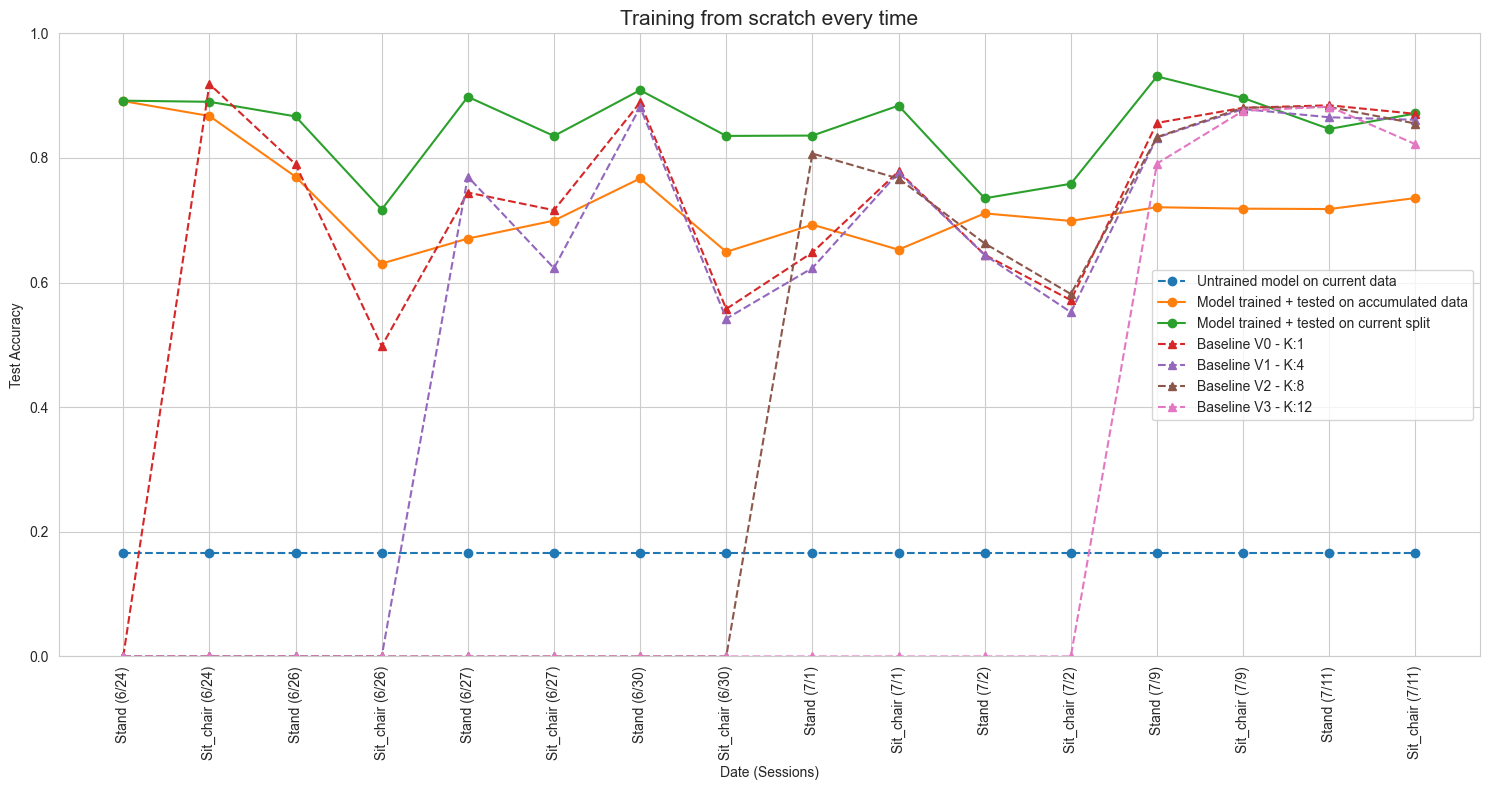

Average of acc without training anything (should be random): 18.49%
Average of acc using previous test data after training: 72.47%
Average of acc using current test data after training: 85.01%
K-1: 74.99% | Target: 84.74
K-4: 73.76% | Target: 85.30
K-8: 78.38% | Target: 84.48
K-12: 84.28% | Target: 88.63


In [6]:
prog_trainer.plot_results(baselines, baseline_K)

for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")